<a href="https://colab.research.google.com/github/NihilisticMotif/Data-Science-Documentation/blob/main/Data-Science-Documentation/Mathematics/DescriptiveStatistics/StandardDeviation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###(1) Standard Deviation and Probability Distribution Function

**What is Standard Deviation?**

* A standard deviation (or σ) = a measure of how dispersed the data is in relation to the mean. 
* Low standard deviation = data are clustered around the mean
* High standard deviation = data are more spread out. 

(https://www.nlm.nih.gov/nichsr/stats_tutorial/section2/mod8_sd.html)

**Standard Deviation Formula**

$s = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$

* $s=$ Standard Deviation $\geq0$
* $n=$ number of all data points.
* $\overline{x}=\sum_{i=1}^n\frac{x_i}{n}$

**The Difference Between Variance And Standard Deviation**
* Variance = $\text{Standard Deviation}^2=s^2$
* reference: https://byjus.com/maths/difference-between-variance-and-standard-deviation/

**The Difference Between Population and sample standard deviation**
* If the data is being considered a population on its own $\implies s = \text{Population standard deviation} = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}}$
* If the data is a sample from a larger population, $\implies s = \text{Sample standard deviation} = \sqrt{\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n-1}}$
* reference: https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

In [1]:
from google.colab import drive

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

path='/content/drive/MyDrive/Data-Science-Documentation/DataSet/K_RealEstate01_ArslanAli.csv'
'''
Source of the example data set: https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset
'''
df = pd.read_csv(path)
df.astype(float)

Mounted at /content/drive


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0.0,0.561,6.980,89.0,2.0980,3.0,320.0,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0.0,0.561,6.980,76.0,2.6540,3.0,320.0,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0.0,0.561,6.123,98.0,2.9870,3.0,320.0,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0.0,0.561,6.222,34.0,2.5430,3.0,329.0,23.0,343.00,76.00,67.0


In [4]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

name=df.columns[1]

print('s = '+str(StandardDeviation(df[name])))

s = 23.21209257197624


**The relationship between Standard Deviation and bell curve (Probability Distribution Function)**

$f(x)=\frac{\exp{((-\frac{1}{2})*(\frac{x-\overline{x}}{s})^2)}}{s\sqrt{2\pi}}=\frac{1}{s\sqrt{2\pi}}*e^{(-\frac{1}{2})*(\frac{x-\overline{x}}{s})^2}$

* $s=$ Standard Deviation $\geq0$
* $n=$ number of all data points.
* $\overline{x}=\sum_{i=1}^n\frac{x_i}{n}$

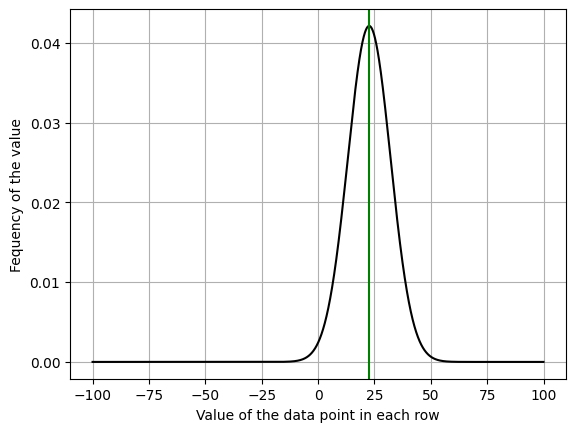

In [5]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/StandardDeviation(Data),2)))/(math.sqrt(np.pi*2)*StandardDeviation(Data))
  return [XLine,YLine]

name=df.columns[-1]
fx=BellCurve(df[name])

plt.plot(fx[0],fx[1],color='black')
#plt.axvline(df[name].mean()-0.675*StandardDeviation(df[name]),color='red') # reference: https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
plt.axvline(df[name].mean(),color='green')
#plt.axvline(df[name].mean()+0.675*StandardDeviation(df[name]),color='blue') # reference: https://www.statology.org/find-quartiles-with-mean-standard-deviation/
plt.xlabel("Value of the data point in each row")
plt.ylabel("Fequency of the value")
plt.grid()
plt.show()

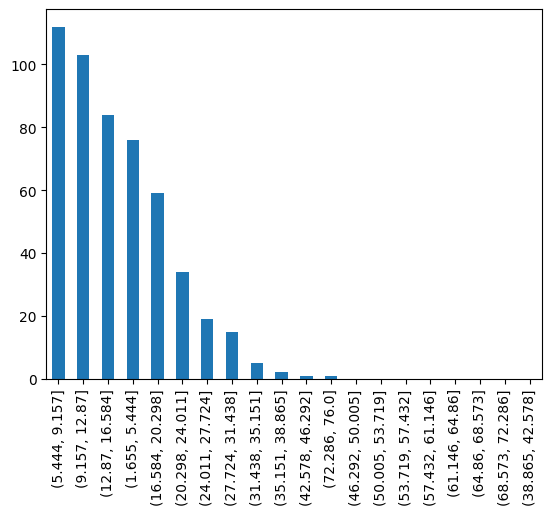

(5.444, 9.157]      112
(9.157, 12.87]      103
(12.87, 16.584]      84
(1.655, 5.444]       76
(16.584, 20.298]     59
(20.298, 24.011]     34
(24.011, 27.724]     19
(27.724, 31.438]     15
(31.438, 35.151]      5
(35.151, 38.865]      2
(42.578, 46.292]      1
(72.286, 76.0]        1
(46.292, 50.005]      0
(50.005, 53.719]      0
(53.719, 57.432]      0
(57.432, 61.146]      0
(61.146, 64.86]       0
(64.86, 68.573]       0
(68.573, 72.286]      0
(38.865, 42.578]      0
Name: LSTAT, dtype: int64


In [15]:
# This code count the frequency of value
# x axis = value (value of the data)
# y axis = fequency (how often the data have the same value)

space=20
name=df.columns[-2]
df[name].value_counts(bins=space)

fig, ax = plt.subplots()
df[name].value_counts(bins=space).plot(ax=ax, kind='bar')
plt.show()
dflist=df[name].value_counts(bins=space)#.index#.tolist()
print((dflist))#.left))

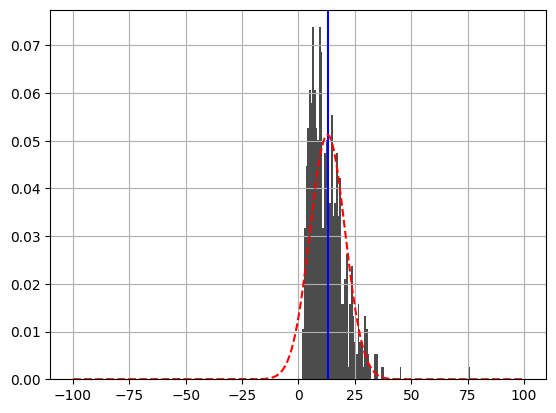

In [51]:
def StandardDeviation(x):
  ans=0
  for i in x:
    ans+=pow(i-x.mean(),2)
  ans/=x.shape[0]
  ans=math.sqrt(ans)
  return ans

def BellCurve(Data, Domain=np.arange(-100,100,0.01)):
  XLine=Domain
  YLine=(np.exp(-(1/2)*pow((XLine-Data.mean())/StandardDeviation(Data),2)))/(math.sqrt(np.pi*2)*StandardDeviation(Data))
  return [XLine,YLine]

name=df.columns[-2]
fx=BellCurve(df[name])
fig, ax = plt.subplots()
space=10

bins = 100
n, bins, patches = ax.hist(
  df[name],        # This parameter are the sequence of data.
  bins,            # This parameter is an optional parameter and it contains the integer
  density = 1,     # This parameter is an optional parameter and it contains the boolean values.
                   # density = counts / (sum(counts) * np.diff(bins))
  color ='black', 
  alpha = 0.7
  # reference: https://www.geeksforgeeks.org/matplotlib-axes-axes-hist-in-python/
  )

plt.axvline(df[name].mean(),color='blue')
ax.plot(fx[0],fx[1], '--',color='red')
plt.grid()
plt.show()

**This is how `density=1` works in ax.hist**

Histogram Graph = $f(x)=h_x$
* $h_x=$ height of the histogram in the respect of input $x$
* $w=$ width of the histogram
* Area under the histogram = $ \int f(x) \text{dx} = \Sigma_{i=1}^nh_iw$

When `density=0`
* Nothing is change.

When `density=1`
* `ax.hist` will modify $ \int f(x) \text{dx} = 1$ in order to make comparison between Normal distribution and $f(x)$ becomes easy.

In [46]:
name=df.columns[-2]
binn=100

dfBell=df[name].value_counts(bins=binn)
print(dfBell)
Start=list(dfBell.index.left)
End=list(dfBell.index.right)
Frequency=dfBell.tolist()
print(Frequency)
print(Start)
print(End)

(6.186, 6.929]      28
(9.157, 9.9]        28
(9.9, 10.642]       26
(4.701, 5.444]      23
(6.929, 7.672]      23
                    ..
(52.234, 52.976]     0
(52.976, 53.719]     0
(53.719, 54.462]     0
(54.462, 55.204]     0
(38.865, 39.608]     0
Name: LSTAT, Length: 100, dtype: int64
[28, 28, 26, 23, 23, 22, 22, 21, 20, 20, 19, 19, 18, 18, 17, 16, 14, 14, 13, 13, 12, 12, 10, 9, 8, 6, 6, 6, 6, 5, 5, 4, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[6.186, 9.157, 9.9, 4.701, 6.929, 12.87, 5.444, 14.356, 3.958, 7.672, 12.128, 8.414, 11.385, 16.584, 3.215, 18.069, 15.841, 13.613, 17.327, 15.099, 10.642, 2.473, 21.04, 23.268, 20.298, 26.239, 18.812, 19.555, 22.526, 29.21, 24.011, 29.953, 1.655, 26.982, 27.724, 24.754, 25.496, 33.666, 30.695, 34.409, 44.807, 37.38, 36.637, 75.257, 21.783, 31.438, 28.467, 66.345, 58.175, 58.918, 5

In [54]:
# This is how density=1 works in ax.hist
# density = BinHeight / (100 * NumberOfAllBin * BinWidth)
# \therefore density dx = (np.sum(density * BinWidth) == 1)
# reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

name=df.columns[-2]
binn=100

Frequency=df[name].value_counts(bins=binn).tolist()
Start=list(df[name].value_counts(bins=binn).index.left)
End=list(df[name].value_counts(bins=binn).index.right)
NumberOfAllBin=df[name].shape[0]
BinWidth=((End[0]-Start[0])/binn)

df01 = pd.DataFrame({'density=0':[], 'density=1':[]})

for i in range(len(Frequency)):
  df01=df01.append(
      pd.DataFrame(
          {'density=0':[Frequency[i]],
           'density=1':[Frequency[i]/(100*NumberOfAllBin*BinWidth)]}),  # this column is approximately equal to n
           #   density = BinHeight / (100 * NumberOfAllBin * BinWidth)
           ignore_index = True)

print('df01')
print(df01)

'''
# In order to plot this graph properly, you must sort [Start,End] pair and re order Frequency in its correct order.
'''

df01
    density=0  density=1
0        28.0   0.073748
1        28.0   0.073748
2        26.0   0.068480
3        23.0   0.060578
4        23.0   0.060578
..        ...        ...
95        0.0   0.000000
96        0.0   0.000000
97        0.0   0.000000
98        0.0   0.000000
99        0.0   0.000000

[100 rows x 2 columns]


<ipython-input-54-a1f05bcc03c7>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df01=df01.append(


'\n# In order to plot this graph properly, you must sort [Start,End] pair and re order Frequency in its correct order.\n'

In [53]:
print(n)

[0.01053964 0.03161891 0.04479346 0.05269819 0.06060291 0.05796801
 0.07377746 0.06060291 0.05269819 0.05006328 0.07377746 0.06850764
 0.03161891 0.04742837 0.05006328 0.05796801 0.03688873 0.0553331
 0.03425382 0.03688873 0.04742837 0.03425382 0.04215855 0.01580946
 0.01580946 0.02107927 0.02634909 0.00263491 0.01580946 0.02371418
 0.01317455 0.00790473 0.00526982 0.01580946 0.00790473 0.00790473
 0.00263491 0.01317455 0.01053964 0.00526982 0.00263491 0.
 0.         0.00526982 0.00526982 0.         0.         0.00263491
 0.00263491 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00263491 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 

**Why does increasing the standard deviation of a normal distribution result in a flatter curve?**
* the total area under the curves of Probability Distribution Function (PDF) has to be equal to 1.
* Standard deviation = a measure of dispersion. 
* That means the larger the standard deviation the more ‘dispersed’ or “spread out” the values of the variable are around the mean. This means that more values will be found farther away from the mean and that the probability of an value is higher. This flattens the curve.

reference: 
* https://www.quora.com/Why-does-increasing-the-standard-deviation-of-a-normal-distribution-result-in-a-flatter-curve
* https://qr.ae/prlYKv

###(2) [Unfinished]: Z score

**What is Z score (a.k.a. The standard score)?**

$Z=\frac{x-\overline{x}}{s}$

* $Z=$ Z score
* $Z=0\implies$ the score is equal to the mean.
* $Z>0\implies$ the score is above the mean.
* $Z<0\implies$ the score indicating it is below the mean.
* $\overline{x}=$ mean value of $x$
* $s=$ Standard Deviation

**Application of Z score**

* allows us to calculate the probability of a score occurring within our normal distribution
* enables us to compare two scores that are from different normal distributions.

reference: 
* https://www.investopedia.com/terms/z/zscore.asp#toc-how-the-z-score-is-used
* https://statistics.laerd.com/statistical-guides/standard-score.php

In [ ]:
def ZScore(InputX,Data):
  Zs=(InputX-Data.mean())/StandardDeviation(Data)
  return Zs

name=df.columns[1]
print(ZScore(20,df[name]))

0.3768533056174269


**Reference:**
* https://youtu.be/1tDckAmNKE8

###To Do Now:
1. Calculate Area To The Left of Z-Score using calculus and impliment it using Python
2. Explain the application of Z score
3. Do this project: `/KaggleProject01_BostonHousing_by_TOLGAHANCEPEL/KaggleProject.ipynb`
4. Machine Learning (Logistic Regression and Neural Network) and math (calculus and linear algebra) tutorial